#### EDA for Scottish Hydro Electric Power Distribution (SHEPD)
##### Neil Martin

<p> This EDA focuses on the SHEPD dataset of the SSEN electricity network and attempts to identify patterns of outages against historical weather data </p>

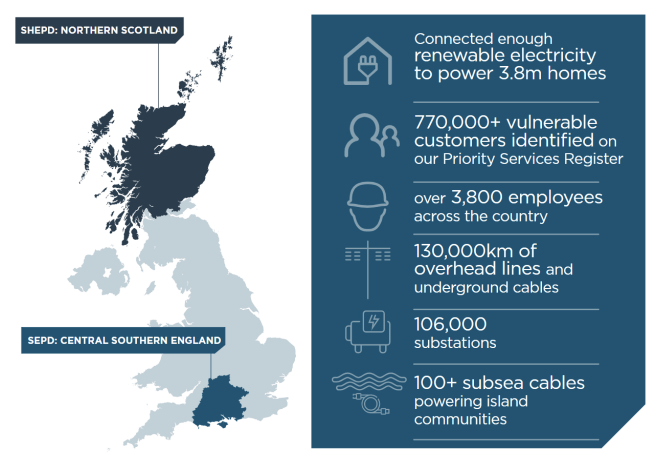

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
shepd = pd.read_csv('nafirs-climate-related-faults-shepd.csv')

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_73519/4263276012.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  shepd = pd.read_csv('nafirs-climate-related-faults-shepd.csv')


In [28]:
shepd.head()

,District_Short_Code,Reporting Year,Voltage 1,Dist_HV_ref,Incident Time,NRN (North),Primary Nrn,Primary name,Equipment Code,Equipment,...,Component,Cause Code,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
0,N/EAST,2000,11,24H000001,01/04/2000 02:02,854_ 001,854.0,FRASERBURGH,1.0,Overhead Lines,...,"Jumper, other than live line -same material as...",30,Birds (including Swans and Geese),X,Not Applicable,0,No,966,103323,107
1,N/EAST,2000,11,24H000002,01/04/2000 03:27,854_ 001,854.0,FRASERBURGH,8.0,Not Applicable,...,Not Applicable,76,Extension of Fault Zone due to Fault Switching...,X,Not Applicable,0,No,259,8288,32
2,N/EAST,2000,11,24H000003,01/04/2000 06:31,849_ 002,849.0,ELLON 11 kV,8.0,Not Applicable,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,645,7095,11
3,ARGYLL,2000,11,57H000001,01/04/2000 07:30,304_ 001,304.0,KILMELFORD PS,1.0,Overhead Lines,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,20,2200,110
4,HIGH,2000,11,41H000001,01/04/2000 17:56,517_ 009,517.0,DRUMNADROCHIT,1.0,Overhead Lines,...,Not Applicable,99,Cause Unknown,X,Not Applicable,0,No,12,312,26


In [29]:
shepd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66542 entries, 0 to 66541
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District_Short_Code                 66542 non-null  object 
 1   Reporting Year                      66542 non-null  int64  
 2   Voltage 1                           66542 non-null  object 
 3   Dist_HV_ref                         66542 non-null  object 
 4   Incident Time                       66542 non-null  object 
 5   NRN (North)                         66542 non-null  object 
 6   Primary Nrn                         66541 non-null  float64
 7   Primary name                        66391 non-null  object 
 8   Equipment Code                      66538 non-null  float64
 9   Equipment                           66542 non-null  object 
 10  Component Code                      61781 non-null  object 
 11  Component                           66542

#### Identify SHEPD districts

In [30]:
districts = shepd['District_Short_Code'].unique()

districts

array(['N/EAST', 'ARGYLL', 'HIGH', 'SHET', 'WISLES', 'ORKN', 'TAYCEN'],
      dtype=object)

#### Stornoway Example

In [31]:
stornoway = shepd[(shepd['District_Short_Code'] == 'WISLES') & (shepd['Primary name'] == 'STORNOWAY GRID')]

columns_to_drop = ['Dist_HV_ref', 'NRN (North)', 'Primary Nrn', 'Equipment Code', 'Cause Code', 'Component Code']
stornoway = stornoway.drop(columns=columns_to_drop)

stornoway

,District_Short_Code,Reporting Year,Voltage 1,Incident Time,Primary name,Equipment,Component,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
96,WISLES,2000,33,12/04/2000 15:47,STORNOWAY GRID,Overhead Lines,"Stay (incl. insulator, make-off baulk etc.)",Wind and Gale (excluding Windborne Material),66,Faulty Installation or Construction,1,No,70,6790,97
417,WISLES,2000,33,31/05/2000 08:00,STORNOWAY GRID,Overhead Lines,Post insulator - porcelain,Lightning,X,Not Applicable,0,No,315,74418,236
633,WISLES,2000,33,06/07/2000 22:51,STORNOWAY GRID,Overhead Lines,"Jumper, other than live line -same material as...",Birds (including Swans and Geese),X,Not Applicable,0,No,118,3390,29
774,WISLES,2000,33,07/08/2000 12:07,STORNOWAY GRID,Not Applicable,Not Applicable,Cause Unknown,X,Not Applicable,0,No,1,4,4
900,WISLES,2000,33,24/08/2000 14:33,STORNOWAY GRID,Transformers,Winding (including insulation) internal connec...,Cause Unknown,X,Not Applicable,0,No,238,24066,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65972,WISLES,2023,33,18/06/2023 09:31,STORNOWAY GRID,Overhead Lines,"Conductor, phase-bare",Lightning,X,Not Applicable,0,No,9,1224,136
66124,WISLES,2023,33,07/07/2023 13:02,STORNOWAY GRID,Overhead Lines,Unknown,Farm and Domestic Animals,X,Not Applicable,0,No,4,732,183
66145,WISLES,2023,33,10/07/2023 11:48,STORNOWAY GRID,Overhead Lines,"Conductor, phase-bare",Transient Fault - No Repair,X,Not Applicable,0,No,4,860,215
66349,WISLES,2023,33,03/08/2023 05:47,STORNOWAY GRID,Miscellaneous Equipment,Unspecified component,Condensation,X,Not Applicable,0,No,0,0,0


In [32]:
stornoway.dtypes

District_Short_Code                   object
Reporting Year                         int64
Voltage 1                             object
Incident Time                         object
Primary name                          object
Equipment                             object
Component                             object
Cause                                 object
Contributory Cause Code               object
Contributory Cause                    object
Damage                                 int64
Exceptional Event                     object
hv cust affected                       int64
hv cust mins lost                      int64
Average Time off supply (Mins off)     int64
dtype: object

#### Transformation of data types to datetime

In [33]:
stornoway['Incident Time'] = pd.to_datetime(stornoway['Incident Time'], format='%d/%m/%Y %H:%M')

#### Reindexing the dataframe to use the Incident Time as the index

In [34]:
stornoway.set_index(['Incident Time'], inplace=True)

stornoway.head()

,District_Short_Code,Reporting Year,Voltage 1,Primary name,Equipment,Component,Cause,Contributory Cause Code,Contributory Cause,Damage,Exceptional Event,hv cust affected,hv cust mins lost,Average Time off supply (Mins off)
Incident Time,,,,,,,,,,,,,,
2000-04-12 15:47:00,WISLES,2000,33,STORNOWAY GRID,Overhead Lines,"Stay (incl. insulator, make-off baulk etc.)",Wind and Gale (excluding Windborne Material),66,Faulty Installation or Construction,1,No,70,6790,97
2000-05-31 08:00:00,WISLES,2000,33,STORNOWAY GRID,Overhead Lines,Post insulator - porcelain,Lightning,X,Not Applicable,0,No,315,74418,236
2000-07-06 22:51:00,WISLES,2000,33,STORNOWAY GRID,Overhead Lines,"Jumper, other than live line -same material as...",Birds (including Swans and Geese),X,Not Applicable,0,No,118,3390,29
2000-08-07 12:07:00,WISLES,2000,33,STORNOWAY GRID,Not Applicable,Not Applicable,Cause Unknown,X,Not Applicable,0,No,1,4,4
2000-08-24 14:33:00,WISLES,2000,33,STORNOWAY GRID,Transformers,Winding (including insulation) internal connec...,Cause Unknown,X,Not Applicable,0,No,238,24066,101


/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_73519/2034402329.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  stornoway_year = stornoway.resample('Y').size()


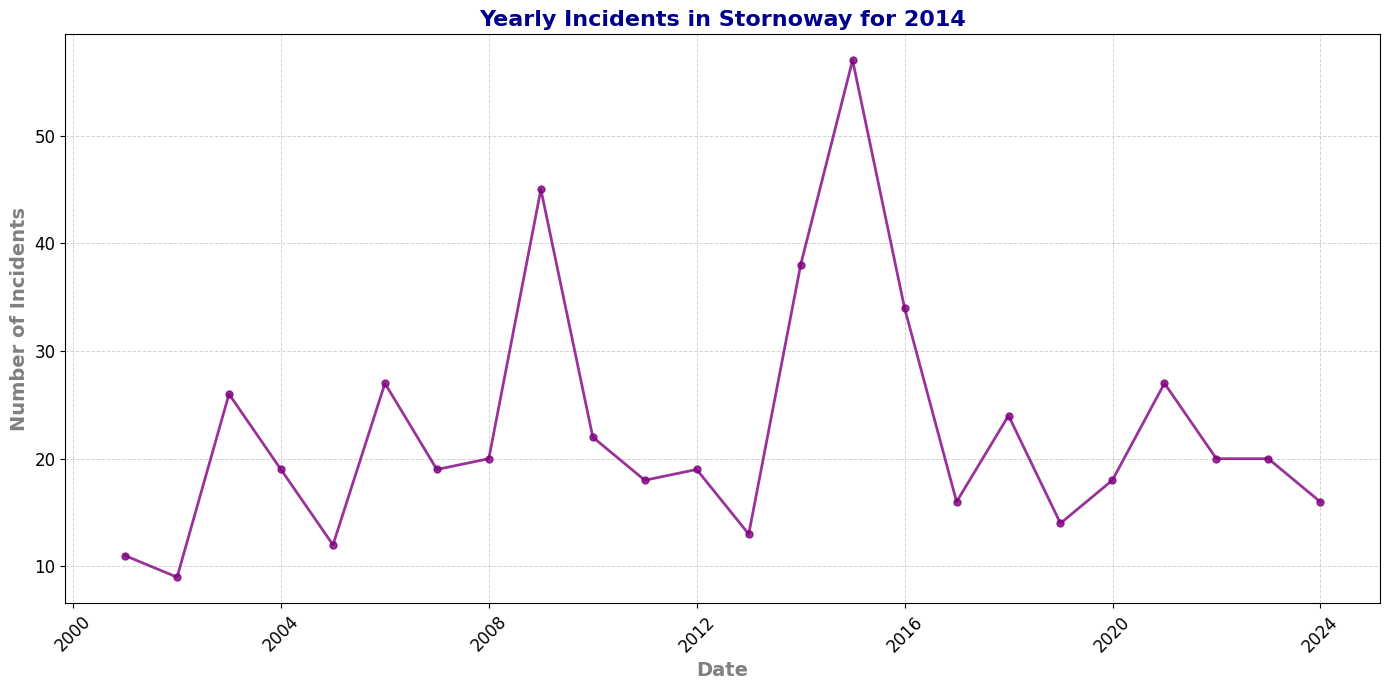

In [35]:
# Yearly incidents in Stornoway
stornoway_year = stornoway.resample('Y').size()

plt.figure(figsize=(14, 7))
plt.plot(stornoway_year.index, stornoway_year, 
         marker='o', linestyle='-', color='purple', 
         linewidth=2, markersize=5, alpha=0.8)

plt.title('Yearly Incidents in Stornoway for 2014', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Number of Incidents', fontsize=14, fontweight='bold', color='gray')

plt.grid(color='lightgray', linestyle='--', linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_73519/911761622.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_incidents_2014 = incidents_2014.resample('M').size()


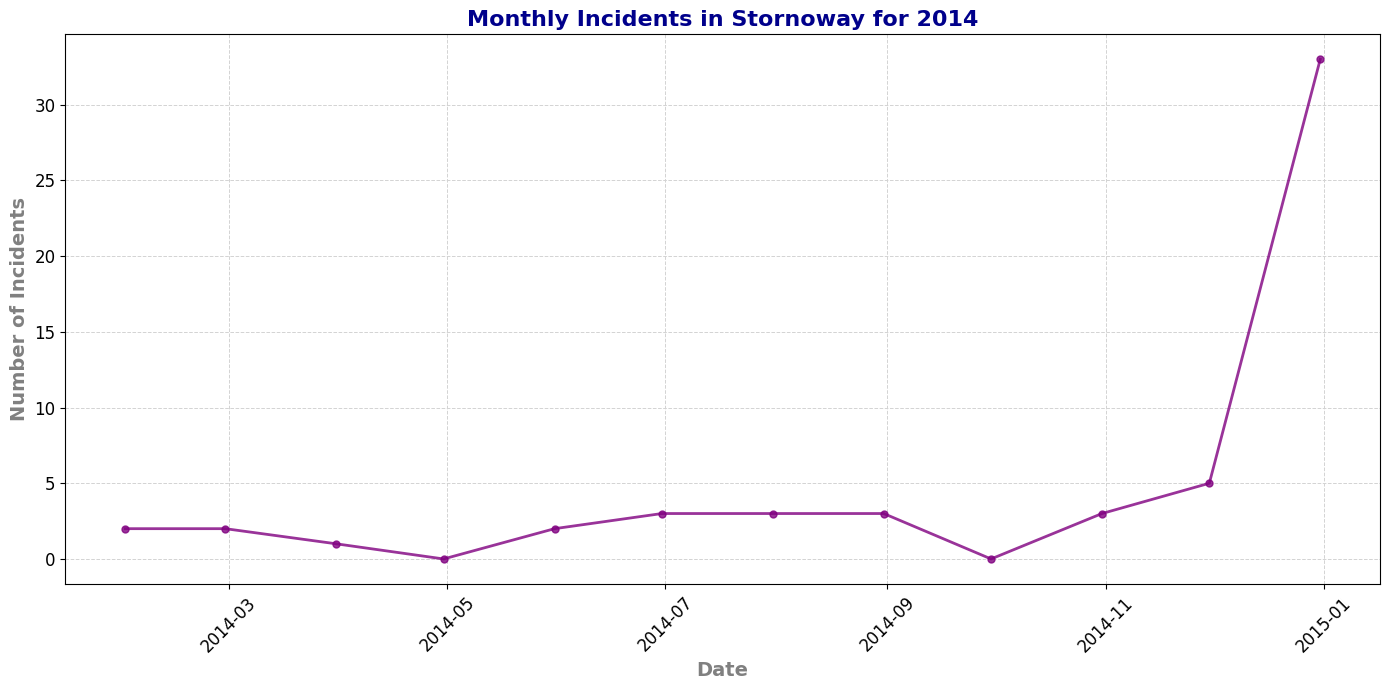

In [36]:
# Filter for incidents in 2014
incidents_2014 = stornoway.loc['2014']

# Resample incidents by month
monthly_incidents_2014 = incidents_2014.resample('M').size()

plt.figure(figsize=(14, 7))
plt.plot(monthly_incidents_2014.index, monthly_incidents_2014, 
         marker='o', linestyle='-', color='purple', 
         linewidth=2, markersize=5, alpha=0.8)

plt.title('Monthly Incidents in Stornoway for 2014', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Number of Incidents', fontsize=14, fontweight='bold', color='gray')

plt.grid(color='lightgray', linestyle='--', linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()